In [10]:
%matplotlib inline
import numpy as np
import config

import plotting_helpers as plots
import utility_functions as utils
import csd_profile as CSD
from KCSD import KCSD3D

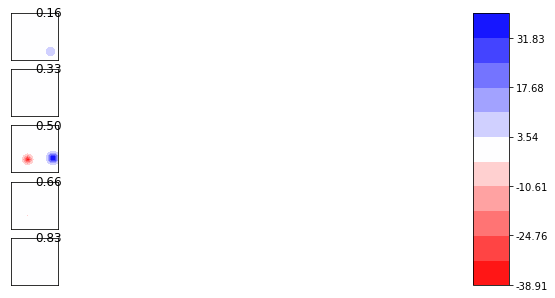

In [2]:
# Lets say we create a random CSD source
csd_profile = CSD.gauss_1d_mono #Type of the CSD Source
csd_profile = CSD.gauss_3d_small
config.dim = 3
csd_at, true_csd = utils.generate_csd(csd_profile, seed=15)
plots.show_csd(csd_at, true_csd)

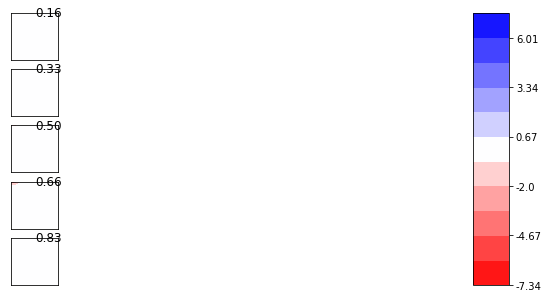

In [3]:
csd_at_b =  np.mgrid[0.5:1.5:100j, -0.7:0.3:100j, 0:1:100j]
csd_at_b, true_csd_b = utils.generate_csd(csd_profile, csd_at_b, seed=0)
plots.show_csd(csd_at_b, true_csd_b)

('Shape of the ele_pos array: ', (125, 3))
('Number of electrodes: ', 125)


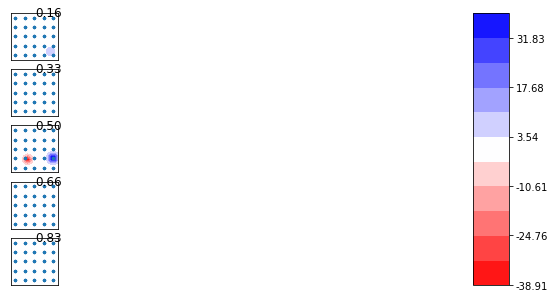

In [4]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
num_ele, ele_pos = utils.generate_electrodes()
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

('Shape of the ele_pos array: ', (125, 3))
('Number of electrodes: ', 125)


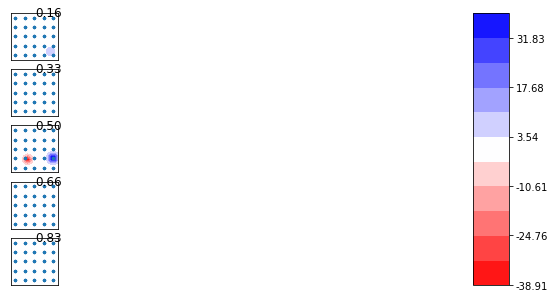

In [5]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation
ele_seed = np.random.RandomState(13)
ele_fail = ele_seed.choice(num_ele, 3, replace=False)
ele_pos_new = np.delete(ele_pos, ele_fail, axis=0)
plots.show_csd(csd_at, true_csd, show_ele=ele_pos)
print('Shape of the ele_pos array: ', ele_pos.shape)
print('Number of electrodes: ',ele_pos.shape[0])

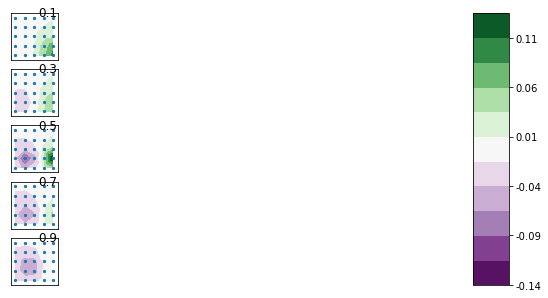

In [8]:
# Lets compute the potential recorded by these electrodes due to the CSD
r = 10.
sigma = 1.
pots = utils.calculate_potential(csd_at, true_csd, ele_pos, r, sigma)
plots.show_pot(ele_pos, pots)

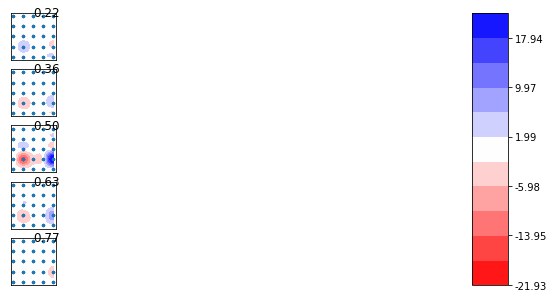

In [13]:
####TODO temporal illustration here
#Lets do KCSD!
k = KCSD3D(ele_pos, pots, sigma=1., h=10., n_src_init=1000, R_init=0.31) 
est_csd = k.values()
est_pos_x = k.estm_x
est_pos_y = k.estm_y
est_pos_z = k.estm_z
est_pos = np.array((est_pos_x, est_pos_y, est_pos_z))
plots.show_csd(est_pos, est_csd[:,:,:,0], show_ele=ele_pos, show_kcsd=True)

In [ ]:
k.cross_validate(Rs=np.arange(0.10, 0.25, 0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()
plots.show_csd(est_pos, est_csd[:,:,0], show_ele=ele_pos, show_kcsd=True)